<a href="https://colab.research.google.com/github/eliveltonlima001/eliveltonlima001/blob/main/ML_II_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"></h1>**

**<h1 align="center">*Machine Learning* II</h1>**

**<h1 align="center">Especialização em Análise de Dados e Inteligência Artificial</h1>**

**<h1 align="center">Autor: Prof. Dr. Paulo Rogério de Almeida Ribeiro</h1>**


<h2><center></center></h2>

<h2><center>Diretoria de Tecnologias na Educação (DTED)</center></h2>

<h2><center>Universidade Federal do Maranhão (UFMA)</center></h2>

<h2><center>21 de Janeiro de 2025</center></h2>

# Redução de dimensionalidade

## Leitura do dataset Iris

In [ ]:
#Dataset disponível na scikit-learn
from sklearn.datasets import load_iris

dados = load_iris(as_frame=True)
dados

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

Mostra variáveis de saída

In [ ]:
dados.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
dados.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Mostra as entradas

In [ ]:
entrada=dados.data
entrada.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualizar os dados

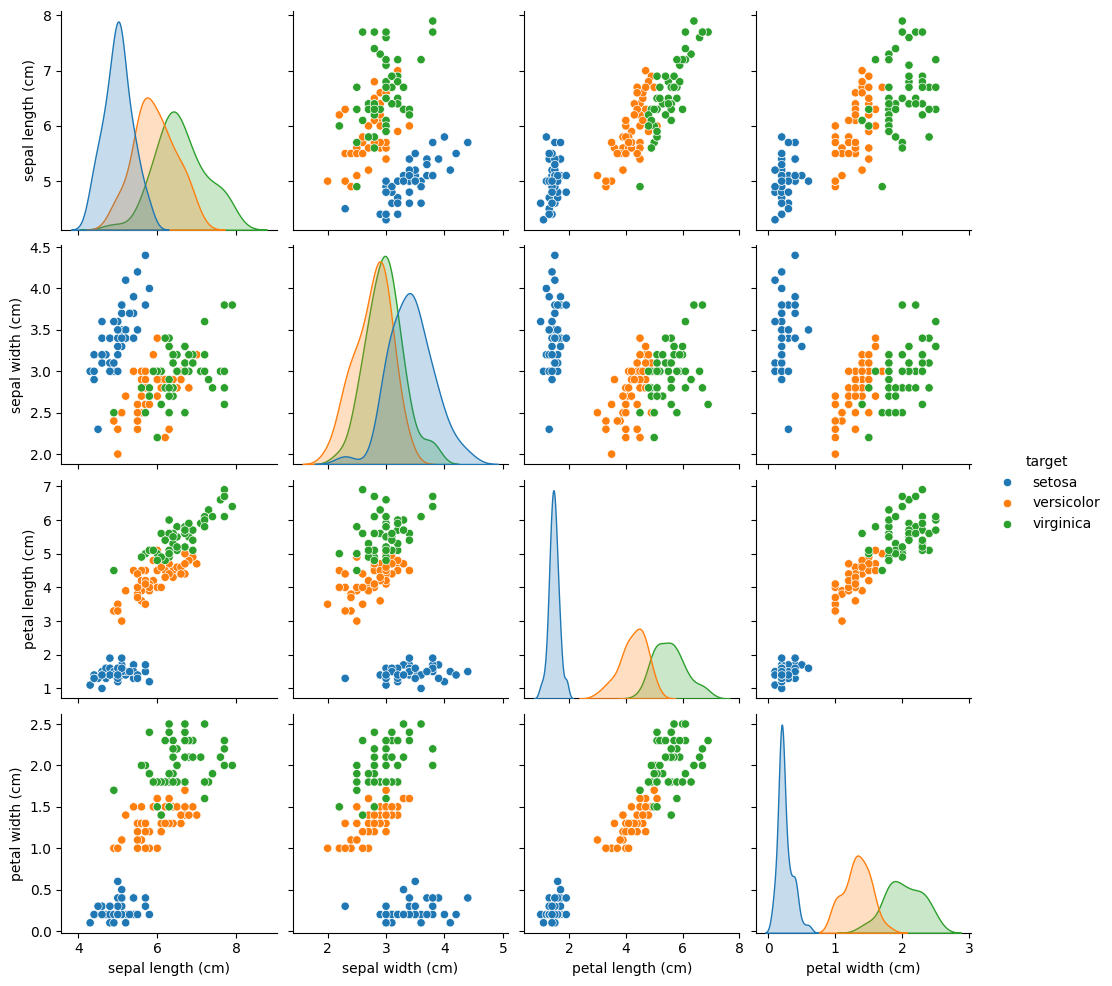

In [ ]:
import seaborn as sns

# Criar coluna "target" com os nomes das classes
dados.frame["target"] = dados.target_names[dados.target]
_ = sns.pairplot(dados.frame, hue="target")

## *Principal Component Analysis* (PCA)

Aplica PCA nos dados (problema da Iris)

In [ ]:
from sklearn.decomposition import PCA

#Normalizar dados de entrada
#entrada = entrada - entrada.mean(axis=0) #Não é necessário porque o PCA aplica antes

pca = PCA()
entrada_transf_pca = pca.fit_transform(entrada)

Mostra a variância explicada por cada PC

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Gráfico da varância explicada acumulativa

(0.9, 1.0)

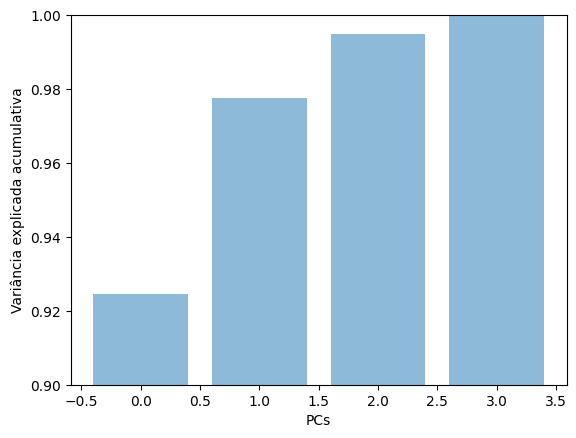

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), alpha=0.5, align='center')
plt.ylabel('Variância explicada acumulativa')
plt.xlabel('PCs')

plt.ylim((0.9, 1)) #Limite em y

Valores da varância explicada acumulativa

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

Cria DataFrame com 2 PCs

In [ ]:
import pandas as pd

pca = PCA(2) # Cria apenas 2 PCs
dados_pc = pd.DataFrame(pca.fit_transform(entrada),columns=['PC1','PC2'])
dados_pc

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


Adiciona coluna das classes no DataFrame

In [ ]:
dados_pc["classes"] = dados.frame["target"]
dados_pc

,PC1,PC2,classes
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


Visualiza dados em relação aos PCs

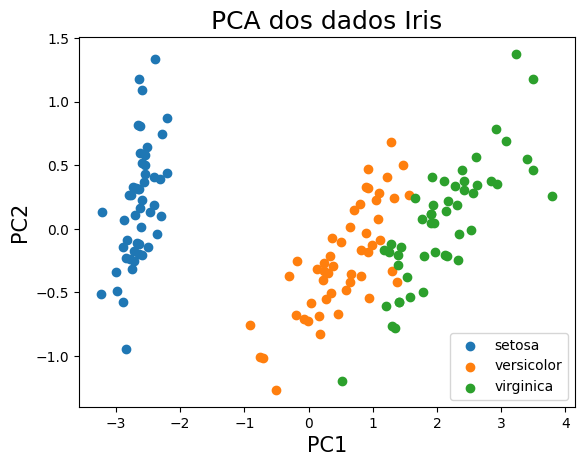

In [ ]:
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title("PCA dos dados Iris",fontsize=18)

cores=['r', 'g', 'b']

for classe_iris, cor_plot in zip(list(dados.target_names), cores):
    indice = dados_pc['classes'] == classe_iris
    plt.scatter(dados_pc.loc[indice, 'PC1'],
                dados_pc.loc[indice, 'PC2'])

plt.legend(dados.target_names,prop={'size': 10})

Relação dos dados de entrada original e os PCs

In [ ]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
relacao_pc_x = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
relacao_pc_x['Característica'] = entrada.columns.values
relacao_pc_x = relacao_pc_x.set_index('Característica')
relacao_pc_x

,PC1,PC2
Característica,,
sepal length (cm),0.361387,0.656589
sepal width (cm),-0.084523,0.730161
petal length (cm),0.856671,-0.173373
petal width (cm),0.358289,-0.075481


# Técnicas de agrupamento

## K-means

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

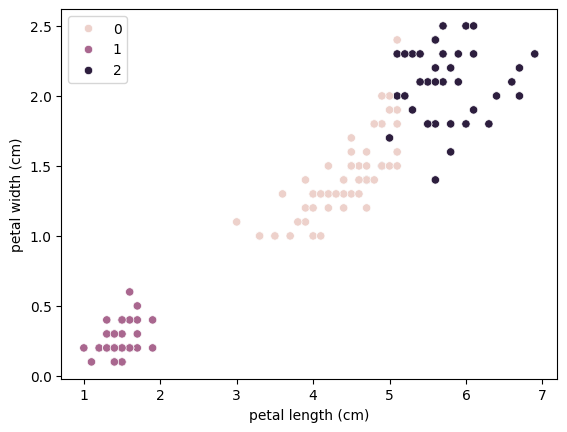

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(entrada)

sns.scatterplot(data = entrada, x = 'petal length (cm)', y = 'petal width (cm)', hue = kmeans.labels_)

Gráfico com rótulos para comparar com o gráfico acima

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

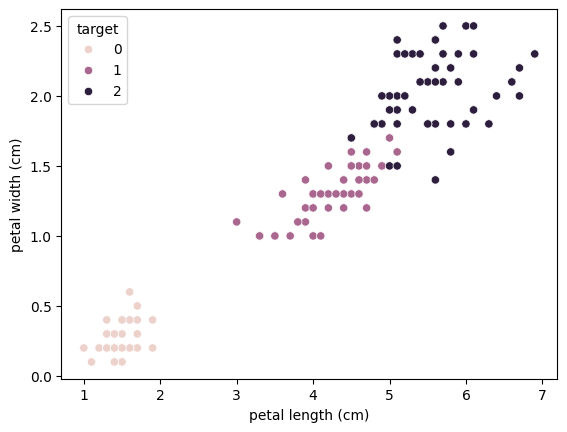

In [ ]:
sns.scatterplot(data = entrada, x = 'petal length (cm)', y = 'petal width (cm)', hue = dados.target)